
# Initial Condition Visualizer

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [13]:
def getCoords(index, length):
    y = index // length
    x = index % length
    return (x, y)

def getIndex(x, y, length):
    return x + y*length

In [127]:
length = 10
fname = f"../data/alt_up_down_L{length}.dat"

In [128]:
with open(fname, "r") as ifile:
    lines = ifile.readlines()
    # print(lines)
    if lines[5] == "\n":
        upList = []
    else:
        upList = [int(pointStr) for pointStr in lines[5].split(",")]

    if lines[7] == "\n":
        downList = []
    else:
        downList = [int(pointStr) for pointStr in lines[7].split(",")]

print("Up:\t", upList)
print("Down:\t", downList)

Up:	 [0, 2, 4, 6, 8, 11, 13, 15, 17, 19, 20, 22, 24, 26, 28, 31, 33, 35, 37, 39, 40, 42, 44, 46, 48, 51, 53, 55, 57, 59, 60, 62, 64, 66, 68, 71, 73, 75, 77, 79, 80, 82, 84, 86, 88, 91, 93, 95, 97, 99]
Down:	 [1, 3, 5, 7, 9, 10, 12, 14, 16, 18, 21, 23, 25, 27, 29, 30, 32, 34, 36, 38, 41, 43, 45, 47, 49, 50, 52, 54, 56, 58, 61, 63, 65, 67, 69, 70, 72, 74, 76, 78, 81, 83, 85, 87, 89, 90, 92, 94, 96, 98]


In [129]:
if len(upList) > 0:
    xUpList, yUpList = zip(*[getCoords(index, length) for index in upList])
else:
    xUpList = []
    yUpList = []

if len(downList) > 0:
    xDownList, yDownList = zip(*[getCoords(index, length) for index in downList])
else:
    xDownList = []
    yDownList = []

# print(xUpList, yUpList)

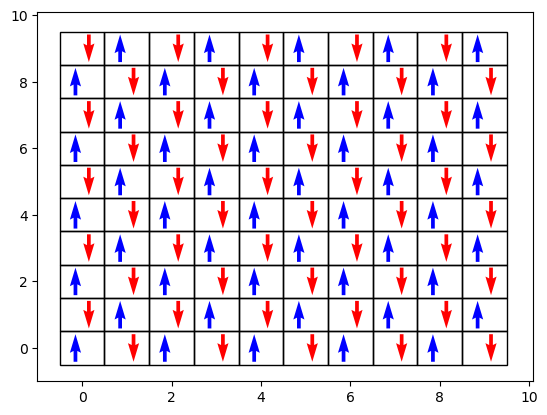

In [130]:
latSpacing = 1
arrowLen = 0.2
adjSpacing = 0.3
rectHeight = 1
rectWidth = 1

fig, ax = plt.subplots()
ax.set_xlim(-1, length+0.1)
ax.set_ylim(-1, length+0.1)
# ax.set_xticks(np.arange(length))
# ax.set_yticks(np.arange(length))


# Up spins (on the left side)
dx = 0
dy = arrowLen
x = np.array(xUpList) - adjSpacing/2
y = np.array(yUpList)
ax.quiver(x, y, dx, dy, angles="xy", color="blue", pivot="middle")

# Down spins
dx = 0
dy = -arrowLen
x = np.array(xDownList) + adjSpacing/2
y = np.array(yDownList)
ax.quiver(x, y, dx, dy, angles="xy", color="red", pivot="middle")

for x in range(length):
    for y in range(length):
        xCorner = x - rectWidth/2
        yCorner = y - rectHeight/2
        rect = mpl.patches.Rectangle((xCorner, yCorner), rectWidth, rectHeight, fill=False)
        ax.add_patch(rect)

plotfilename = "".join((fname.split("/")[-1]).split(".")[:-1])
fig.savefig("../plots/PNGs/" + plotfilename + ".png")
fig.savefig("../plots/PDFs/" + plotfilename + ".pdf")